# Probability of co-occurence

A simplistic test to investigate the probability that two agents occupy the same spot on a grid, for different levels of grid finess (different number of nodes in a grid), assuming that the number of agents scales proportinally with the nmber of nodes in a grid. That's a complicated explanation, but essentially, 5 objects are randomly distributed among 100 boxes, or 50 objects among 1000 boxes, or 500 objects among 10,000 boxes etc. How does the probability of (more than one object in a box) scale?

Numerically, I get that it is supposed to increase linearly with the number of points on a grid, and somehow it felt strange to me. But apparently it's true...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

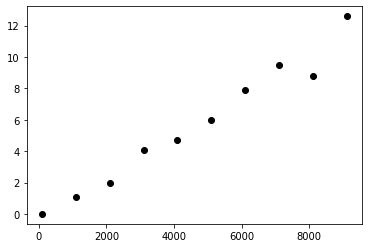

In [5]:
k = 0.05
ntrials = 10
for n_locations in np.arange(100,10000,1000,dtype=int).tolist():
    temp = 0
    for itrial in range(ntrials):
        n_animals = round(n_locations * k)
        x = np.random.randint(low=0, high=n_locations, size=n_animals)
        n_pairs = sum([1 for i in np.unique(x) if sum([1 for j in x if j==i])>1]) # Counts number of repetitions
        temp += n_pairs
    plt.plot(n_locations,temp/ntrials,'ko')

The math is super-simple. For every node out of N total, the probability that it will get exactly one of n objects is equal to $P(1) = n\frac{1}{N}\big(1-\frac{1}{N}\big)^{n-1}$, and as we can assume that for high N the second bracket is $\approx 1$, this thing evaluates to something close to $n/N$.

Similarly, the probability of getting exactly 2 objects is: $\displaystyle P(2) = \frac{n(n-1)}{2}\frac{1}{N^2} \left( 1-\frac{1}{N} \right) ^{n-2}$. We can ignore the 2nd bracket, and we can assume that $n \approx n-1$, so this evaluates to something proportional to $(n/N)^2$.

But there are N nodes in the grid in total, so if for every element P(2) is equal to $(n/N)^2$, then the expected number of pairs in a grid is N times that, and so is proportional to $n^2 / N$. But if $n = kN$, then the expected number of pairs is $Nk^2$, and so scales linearly with N.